# <center><bold>CAR PRICE PREDICTION</bold></center>

### 1) Import Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

### 2) Import Data

In [4]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
df.shape

(301, 9)

### 3) Data Inspection

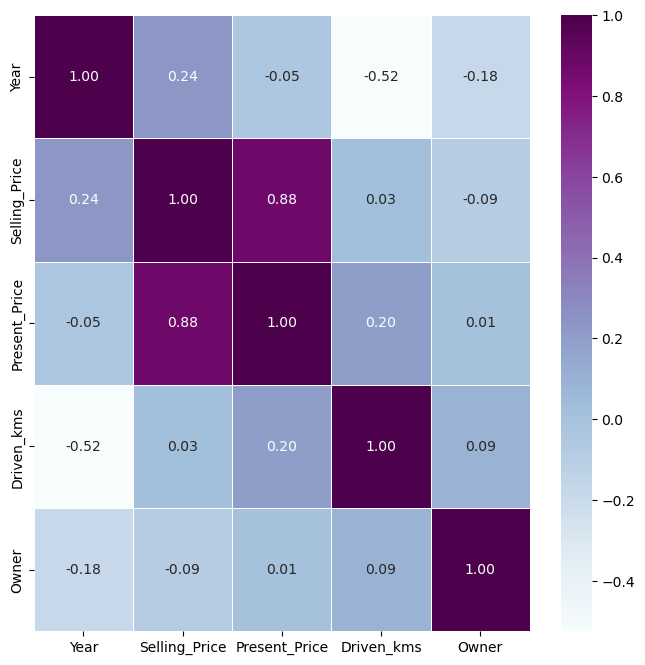

In [14]:
#Correlational matrix
numeric_columns = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms','Owner']]
correlation_matrix = numeric_columns.corr()

#Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f',linewidths=0.5)

plt.show()

In [15]:
#top-car
top_car = df['Car_Name'].value_counts().nlargest(10)
top_car.head()

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
Name: count, dtype: int64

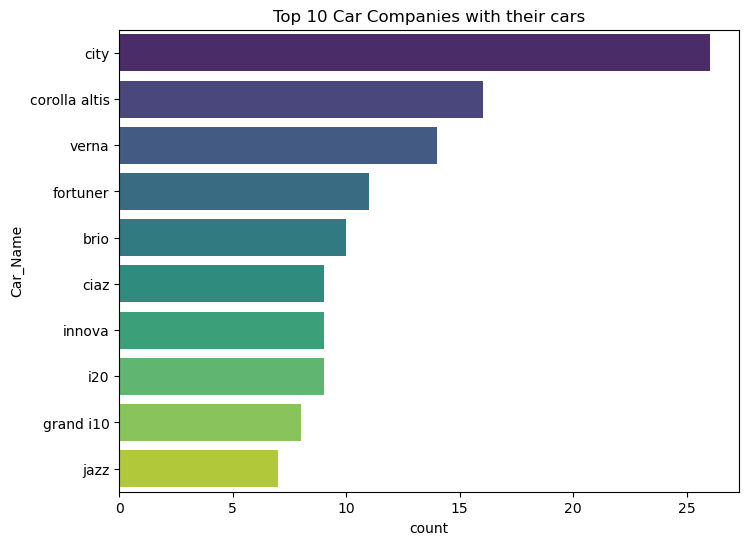

In [16]:
#top 10 companies with highest number of used cars for sale
plt.figure(figsize=(8,6))
sns.countplot(y=df.Car_Name, order=top_car.index, palette='viridis')
plt.title('Top 10 Car Companies with their cars')

plt.show()

In [17]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

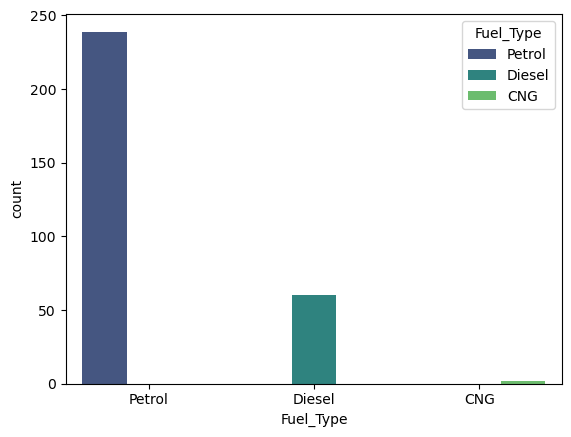

In [18]:
sns.countplot(x=df['Fuel_Type'], hue=df['Fuel_Type'], palette='viridis')

<Axes: xlabel='Selling_type', ylabel='count'>

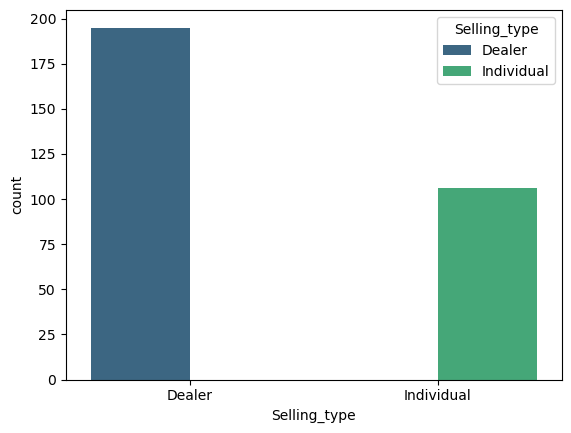

In [19]:
sns.countplot(x=df['Selling_type'],hue=df['Selling_type'], palette='viridis')

<Axes: xlabel='Selling_Price', ylabel='Count'>

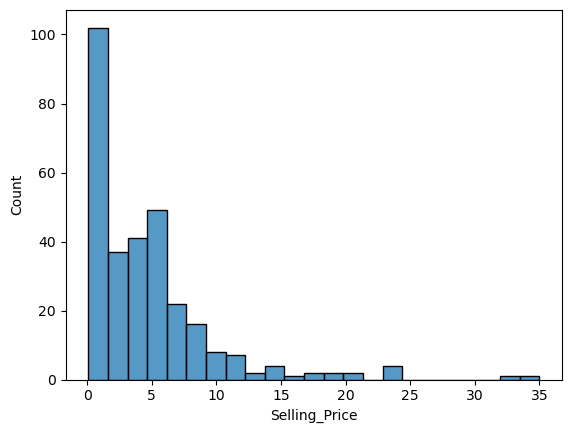

In [21]:
sns.histplot(df['Selling_Price'])
     

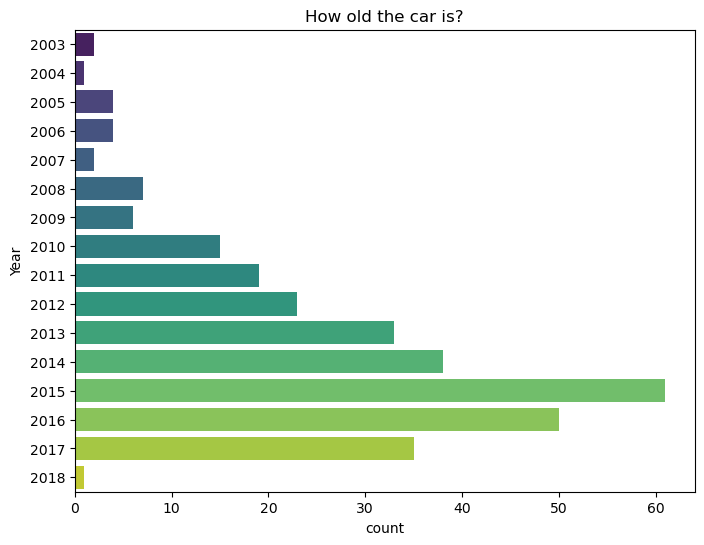

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(y=df['Year'],palette = 'viridis')
plt.title('How old the car is?')
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Driven_kms'>

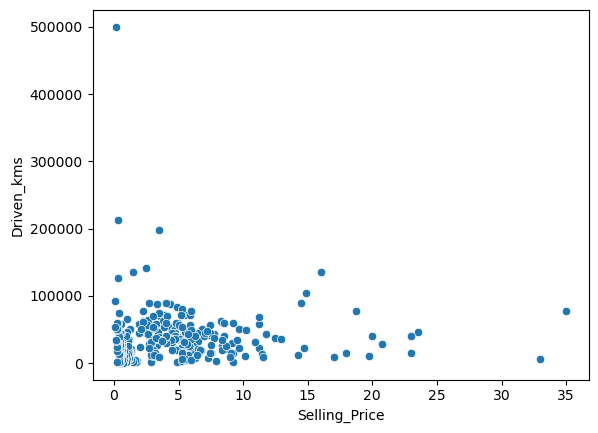

In [23]:
sns.scatterplot(x=df['Selling_Price'], y=df['Driven_kms'])

In [24]:
df.select_dtypes(include=['object']).columns

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

### 4) Label Encoder

In [28]:
#initiate obj
label_encoder = LabelEncoder()

#convert categorical columns
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [29]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [31]:
#split data into training and testing
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [33]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5) Model Building

<li>Linear Regression</li>
<li>Decision Tree Regressor</li>
<li>Random Forest Regressor</li>
<li>XGBoost Regressor</li>
<li>MLP Regressor</li>

In [34]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)

#Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test_scaled)

# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_reg.predict(X_test_scaled)

# XGBoost Regressor
xgboost_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                               max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)
xgboost_reg.fit(X_train_scaled, y_train)
xgboost_predictions = xgboost_reg.predict(X_test_scaled)

# MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)
mlp_predictions = mlp_reg.predict(X_test_scaled)

### 6) Model Evaluation

<li>Mean Squared Error</li>
<li>R Squared Error</li>

In [39]:
#Evaluate the models
models = {'Linear Regression': linear_reg, 'Decision Tree Regressor': decision_tree_reg,
          'Random Forest Regressor': random_forest_reg, 'XGBoost Regressor': xgboost_reg,
          'MLP Regressor': mlp_reg}

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(name, "MSE:", round(mse,2), "R-squared:", round(r2,2))

Linear Regression MSE: 6.51 R-squared: 0.77
Decision Tree Regressor MSE: 2.27 R-squared: 0.92
Random Forest Regressor MSE: 3.48 R-squared: 0.88
XGBoost Regressor MSE: 7.04 R-squared: 0.75
MLP Regressor MSE: 1.49 R-squared: 0.95


The best model is MLP Regressor

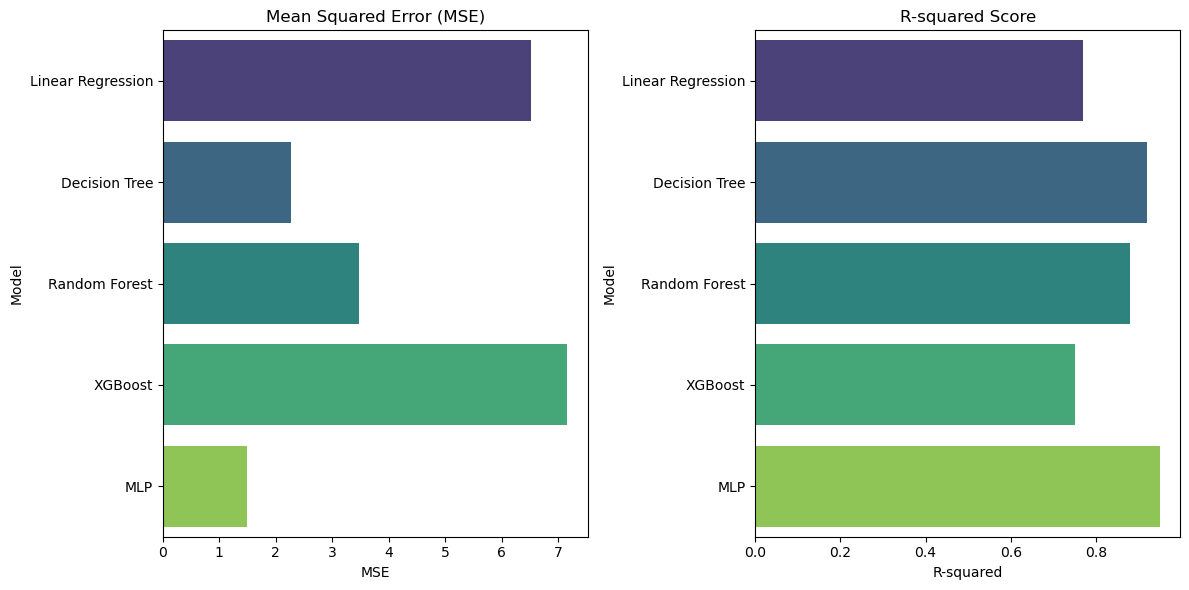

In [40]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'MLP']

# Corresponding MSE and R² scores
mse_scores = [6.51, 2.27, 3.48, 7.16, 1.49]
r2_scores = [0.77, 0.92, 0.88, 0.75, 0.95]

# Create a DataFrame for easy plotting
performance_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'R-squared': r2_scores})

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x='MSE', y='Model', data=performance_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('MSE')

# Bar plot for R-squared
plt.subplot(1, 2, 2)
sns.barplot(x='R-squared', y='Model', data=performance_df, palette='viridis')
plt.title('R-squared Score')
plt.xlabel('R-squared')

plt.tight_layout()
plt.show()
